<a href="https://colab.research.google.com/github/prabuarjunan/AI-ML-NFL-Dataset/blob/master/NFL_Data_Analysis_PA_CSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
autosave 60

Autosaving every 60 seconds


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#installing geopandas
#!pip install --upgrade geopandas

In [4]:
#importing packages for data analysis
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
#import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
#set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
#run this cell to mount your Google drive to the notebook; you need to give it access to your SCU Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#you will need to copy the pathway to whatever data you want to access
df_CSP  = pd.read_csv('/content/drive/Shareddrives/Python_NFL_Project/Career_Stats_Passing.csv', index_col=1)

In [41]:
df_CSP

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1948,Chicago Rockets,0,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Farris, Tom",tomfarris/2513861,NaN,1947,Chicago Bears,9,2,0,0.0,0.20,0,0.0,0.0,0,0.0,0,0.0,--,0,0,0,0,39.60
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,--,0,0,0,0,31.50
"Demory, Bill",tomfarris/2513861,NaN,1974,New York Jets,1,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Demory, Bill",tomfarris/2513861,NaN,1973,New York Jets,6,39,12,30.8,6.50,159,4.1,26.5,2,5.1,8,20.5,--,0,0,8,73,22.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Anderson, Bill",tomfarris/2513861,NaN,1962,Washington Redskins,12,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Anderson, Bill",tomfarris/2513861,NaN,1961,Washington Redskins,14,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Anderson, Bill",tomfarris/2513861,NaN,1960,Washington Redskins,12,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00


In [9]:
print('Number of Rows in Career_Stats_Passing.csv: ' + str(len(df_CSP)))

Number of Rows in Career_Stats_Passing.csv: 8525


In [10]:
df_CSP.isna().sum()

Player Id                            0
Position                          7414
Year                                 0
Team                                 0
Games Played                         0
Passes Attempted                     0
Passes Completed                     0
Completion Percentage                0
Pass Attempts Per Game               0
Passing Yards                        0
Passing Yards Per Attempt            0
Passing Yards Per Game               0
TD Passes                            0
Percentage of TDs per Attempts       0
Ints                                 0
Int Rate                             0
Longest Pass                         0
Passes Longer than 20 Yards          0
Passes Longer than 40 Yards          0
Sacks                                0
Sacked Yards Lost                    0
Passer Rating                        0
dtype: int64

In [11]:
df_CSP.isna().sum().sum()

7414

In [12]:
df_CSP.describe()
df_CSP.info()

,Year,Games Played,Pass Attempts Per Game,Passer Rating
count,8525.00,8525.00,8525.00,8525.00
mean,1982.05,10.29,5.79,32.23
std,23.82,5.31,10.53,40.49
min,1924.00,0.00,0.00,0.00
25%,1965.00,6.00,0.00,0.00
50%,1985.00,12.00,0.00,0.00
75%,2003.00,15.00,5.90,64.90
max,2016.00,17.00,51.00,158.30


<class 'pandas.core.frame.DataFrame'>
Index: 8525 entries, Farris, Tom to Anderson, Bill
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player Id                       8525 non-null   object 
 1   Position                        1111 non-null   object 
 2   Year                            8525 non-null   int64  
 3   Team                            8525 non-null   object 
 4   Games Played                    8525 non-null   int64  
 5   Passes Attempted                8525 non-null   object 
 6   Passes Completed                8525 non-null   object 
 7   Completion Percentage           8525 non-null   object 
 8   Pass Attempts Per Game          8525 non-null   float64
 9   Passing Yards                   8525 non-null   object 
 10  Passing Yards Per Attempt       8525 non-null   object 
 11  Passing Yards Per Game          8525 non-null   object 
 12  TD Passes          

Annual Quarterback Performance = (passer ratingn * games playedx)Total Games Played that year

In [58]:
PRT = df_CSP['Passer Rating']
GPD = df_CSP['Games Played']
PID = df_CSP['Player Id']

AQP = (PRT * GPD)/GPD
AQP.isna().sum()
AQP.dropna(inplace=True)
AQP
df_CSP = df_CSP.loc[~df_CSP.index.duplicated(),:]


df_CSP

71

Name
Farris, Tom       31.50
Reid, Breezy       0.00
Scarbath, Jack    43.50
Maddox, Tommy     75.30
Newman, Harry     51.70
                   ... 
Lash, Jim          0.00
Naanee, Legedu     0.00
Osweiler, Brock   90.40
Ramsey, Steve     64.00
Anderson, Bill     0.00
Length: 955, dtype: float64

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,--,0,0,0,0,31.50
"Reid, Breezy",tomfarris/2513861,NaN,1954,Green Bay Packers,12,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Scarbath, Jack",tomfarris/2513861,NaN,1953,Washington Redskins,12,129,45,34.9,10.80,862,6.7,71.8,9,7.0,12,9.3,--,0,0,0,120,43.50
"Maddox, Tommy",tomfarris/2513861,NaN,2003,Pittsburgh Steelers,16,519,298,57.4,32.40,"3,414",6.6,213.4,18,3.5,17,3.3,53,44,4,41,242,75.30
"Newman, Harry",tomfarris/2513861,NaN,1933,New York Giants,14,136,53,39.0,9.70,973,7.2,69.5,11,8.1,17,12.5,--,0,0,0,0,51.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Naanee, Legedu",tomfarris/2513861,NaN,2010,San Diego Chargers,10,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Osweiler, Brock",tomfarris/2513861,QB,2014,Denver Broncos,4,10,4,40.0,2.50,52,5.2,13.0,1,10.0,0,0.0,38,1,0,0,0,90.40
"Fiske, Max",tomfarris/2513861,NaN,1937,Chicago Cardinals,0,--,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00


In [59]:
df_CSP.insert(6,"Annual_Quarterback_Performance", AQP)

In [60]:
df_CSP

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Annual_Quarterback_Performance,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,31.50,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,--,0,0,0,0,31.50
"Reid, Breezy",tomfarris/2513861,NaN,1954,Green Bay Packers,12,--,0.00,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Scarbath, Jack",tomfarris/2513861,NaN,1953,Washington Redskins,12,129,43.50,45,34.9,10.80,862,6.7,71.8,9,7.0,12,9.3,--,0,0,0,120,43.50
"Maddox, Tommy",tomfarris/2513861,NaN,2003,Pittsburgh Steelers,16,519,75.30,298,57.4,32.40,"3,414",6.6,213.4,18,3.5,17,3.3,53,44,4,41,242,75.30
"Newman, Harry",tomfarris/2513861,NaN,1933,New York Giants,14,136,51.70,53,39.0,9.70,973,7.2,69.5,11,8.1,17,12.5,--,0,0,0,0,51.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Naanee, Legedu",tomfarris/2513861,NaN,2010,San Diego Chargers,10,--,0.00,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00
"Osweiler, Brock",tomfarris/2513861,QB,2014,Denver Broncos,4,10,90.40,4,40.0,2.50,52,5.2,13.0,1,10.0,0,0.0,38,1,0,0,0,90.40
"Fiske, Max",tomfarris/2513861,NaN,1937,Chicago Cardinals,0,--,NaN,--,--,0.00,--,--,--,--,--,--,--,--,--,--,--,--,0.00


In [62]:
df_CSP = df_CSP[df_CSP.Annual_Quarterback_Performance != 0.00]

In [64]:
df_CSP.head()

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Annual_Quarterback_Performance,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,,,
"Farris, Tom",tomfarris/2513861,NaN,1946,Chicago Bears,11,21,31.50,8,38.1,1.90,108,5.1,9.8,1,4.8,2,9.5,--,0,0,0,0,31.50
"Scarbath, Jack",tomfarris/2513861,NaN,1953,Washington Redskins,12,129,43.50,45,34.9,10.80,862,6.7,71.8,9,7.0,12,9.3,--,0,0,0,120,43.50
"Maddox, Tommy",tomfarris/2513861,NaN,2003,Pittsburgh Steelers,16,519,75.30,298,57.4,32.40,"3,414",6.6,213.4,18,3.5,17,3.3,53,44,4,41,242,75.30
"Newman, Harry",tomfarris/2513861,NaN,1933,New York Giants,14,136,51.70,53,39.0,9.70,973,7.2,69.5,11,8.1,17,12.5,--,0,0,0,0,51.70
"Harrison, Kenny",tomfarris/2513861,NaN,1977,San Francisco 49ers,14,1,39.60,0,0.0,0.10,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,39.60


In [67]:
df_CSP.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [68]:
df_CSP

,Player Id,Position,Year,Team,Games Played,Passes Attempted,Annual_Quarterback_Performance,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,Passing Yards Per Attempt,Passing Yards Per Game,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
Name,,,,,,,,,,,,,,,,,,,,,,,
"Weddle, Eric",tomfarris/2513861,SS,2014,San Diego Chargers,16,1,39.60,0,0.0,0.10,0,0.0,0.0,0,0.0,0,0.0,--,0,0,0,0,39.60
"Colquitt, Dustin",tomfarris/2513861,P,2014,Kansas City Chiefs,16,1,91.70,1,100.0,0.10,6,6.0,0.4,0,0.0,0,0.0,6,0,0,0,0,91.70
"Yates, T.J.",tomfarris/2513861,QB,2014,Atlanta Falcons,1,4,77.10,3,75.0,4.00,64,16.0,64.0,0,0.0,1,25.0,40,1,1,0,0,77.10
"McCoy, Colt",tomfarris/2513861,QB,2014,Washington Redskins,5,128,96.40,91,71.1,25.60,"1,057",8.3,211.4,4,3.1,3,2.3,70T,12,4,17,117,96.40
"Brees, Drew",tomfarris/2513861,QB,2014,New Orleans Saints,16,659,97.00,456,69.2,41.20,"4,952",7.5,309.5,33,5.0,17,2.6,69T,52,10,29,186,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Henne, Chad",tomfarris/2513861,QB,2014,Jacksonville Jaguars,3,78,80.70,42,53.8,26.00,492,6.3,164.0,3,3.8,1,1.3,63T,5,3,16,105,80.70
"Garoppolo, Jimmy",tomfarris/2513861,QB,2014,New England Patriots,6,27,101.20,19,70.4,4.50,182,6.7,30.3,1,3.7,0,0.0,37,2,0,5,36,101.20
"Glennon, Mike",tomfarris/2513861,QB,2014,Tampa Bay Buccaneers,6,203,83.30,117,57.6,33.80,"1,417",7.0,236.2,10,4.9,6,3.0,41,23,3,16,91,83.30


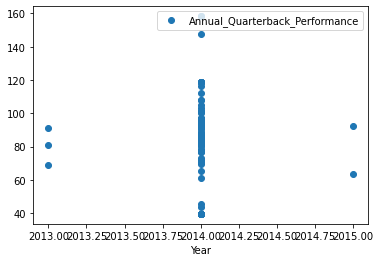

In [71]:
df_CSP.plot(x='Year', y='Annual_Quarterback_Performance', style='o')

In [73]:
#grouped_year = df_CSP.groupby('Year').agg({'Year': ['mean', 'min', 'max']})
#grouped_year = df_CSP.groupby('Year')['Games Played'].sum()
#grouped_year
#df_CSP.insert(2,"average_game_played", grouped_year)
#df_CSP.drop("average_game_played",axis=1,inplace=True)
#rslt_df_CSP = df_CSP[df_CSP['Player Id'] == 'tomfarris/2513861'] 
#print('\nResult dataframe :\n', rslt_df_CSP)


In [ ]:
#